Here i am showing how i dowloaded data about tip amounts and displayed said data into a histogram. 

In [13]:
 import requests

def download_data(url, headers=None, params=None, timeout=10):
    """
    Downloads data from a given URL and returns it as a string.

    Parameters:
        url (str): The URL of the data to download.
        headers (dict, optional): The headers to include in the request.
        params (dict, optional): The query string parameters to include in the request.
        timeout (int, optional): The number of seconds to wait for a response.

    Returns:
        str: The downloaded data as a string.
    """
    response = requests.get(url, headers=headers, params=params, timeout=timeout)
    if response.ok:
        return response.text
    else:
        response.raise_for_status()


In [9]:
data_url = "https://raw.githubusercontent.com/pandas-dev/pandas/master/pandas/tests/io/data/csv/tips.csv"
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"}
params = {"format": "json"}

try:
    data = download_data(data_url, headers=headers, params=params)
    print(data)
except requests.exceptions.RequestException as e:
    print("Failed to download data:", e)


total_bill,tip,sex,smoker,day,time,size
16.99,1.01,Female,No,Sun,Dinner,2
10.34,1.66,Male,No,Sun,Dinner,3
21.01,3.5,Male,No,Sun,Dinner,3
23.68,3.31,Male,No,Sun,Dinner,2
24.59,3.61,Female,No,Sun,Dinner,4
25.29,4.71,Male,No,Sun,Dinner,4
8.77,2.0,Male,No,Sun,Dinner,2
26.88,3.12,Male,No,Sun,Dinner,4
15.04,1.96,Male,No,Sun,Dinner,2
14.78,3.23,Male,No,Sun,Dinner,2
10.27,1.71,Male,No,Sun,Dinner,2
35.26,5.0,Female,No,Sun,Dinner,4
15.42,1.57,Male,No,Sun,Dinner,2
18.43,3.0,Male,No,Sun,Dinner,4
14.83,3.02,Female,No,Sun,Dinner,2
21.58,3.92,Male,No,Sun,Dinner,2
10.33,1.67,Female,No,Sun,Dinner,3
16.29,3.71,Male,No,Sun,Dinner,3
16.97,3.5,Female,No,Sun,Dinner,3
20.65,3.35,Male,No,Sat,Dinner,3
17.92,4.08,Male,No,Sat,Dinner,2
20.29,2.75,Female,No,Sat,Dinner,2
15.77,2.23,Female,No,Sat,Dinner,2
39.42,7.58,Male,No,Sat,Dinner,4
19.82,3.18,Male,No,Sat,Dinner,2
17.81,2.34,Male,No,Sat,Dinner,4
13.37,2.0,Male,No,Sat,Dinner,2
12.69,2.0,Male,No,Sat,Dinner,2
21.7,4.3,Male,No,Sat,Dinner,2
19.65,3.0,Female,No,Sat,Di

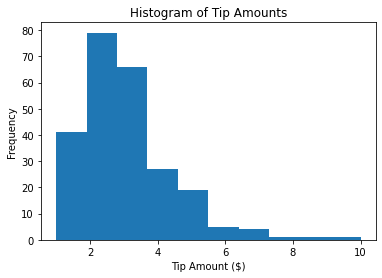

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import io

data_url = "https://raw.githubusercontent.com/pandas-dev/pandas/master/pandas/tests/io/data/csv/tips.csv"
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"}
params = {"format": "json"}

try:
    data_str = "\n".join(data.splitlines())
    df = pd.read_csv(io.StringIO(data_str))
    tip_amounts = df["tip"]
    
    # Plot a histogram of the tip amounts
    plt.hist(tip_amounts, bins=10)
    plt.title("Histogram of Tip Amounts")
    plt.xlabel("Tip Amount ($)")
    plt.ylabel("Frequency")
    plt.show()
    
except requests.exceptions.RequestException as e:
    print("Failed to download data:", e)
